**The group members:**

    John Clayton BLANC
    Jovany ANTOINE
    Jerry SAINT-LOUIS
    Sanon Mitelson
    
**Course:**

    Machine Learning
    
**Date:**

    06/03/2023
    
**Project description:**
    
    A brain tumor is considered an aggressive disease, both in children and adults. Brain tumours are responsible for 85-90% of all primary central nervous system (CNS) tumours. Every year, approximately 11,700 people have brain tumours. Magnetic resonance imaging (MRI) is the best method of detecting brain tumors. A radiologist should look at the images generated by the scans. Due to the degree of complexity of brain tumours and their properties manual examination can be subject to error. This project offers a tumour detection and classification system using deep learning algorithms, it offers a higher precision than manual classification.

# Brain Tumor Detection

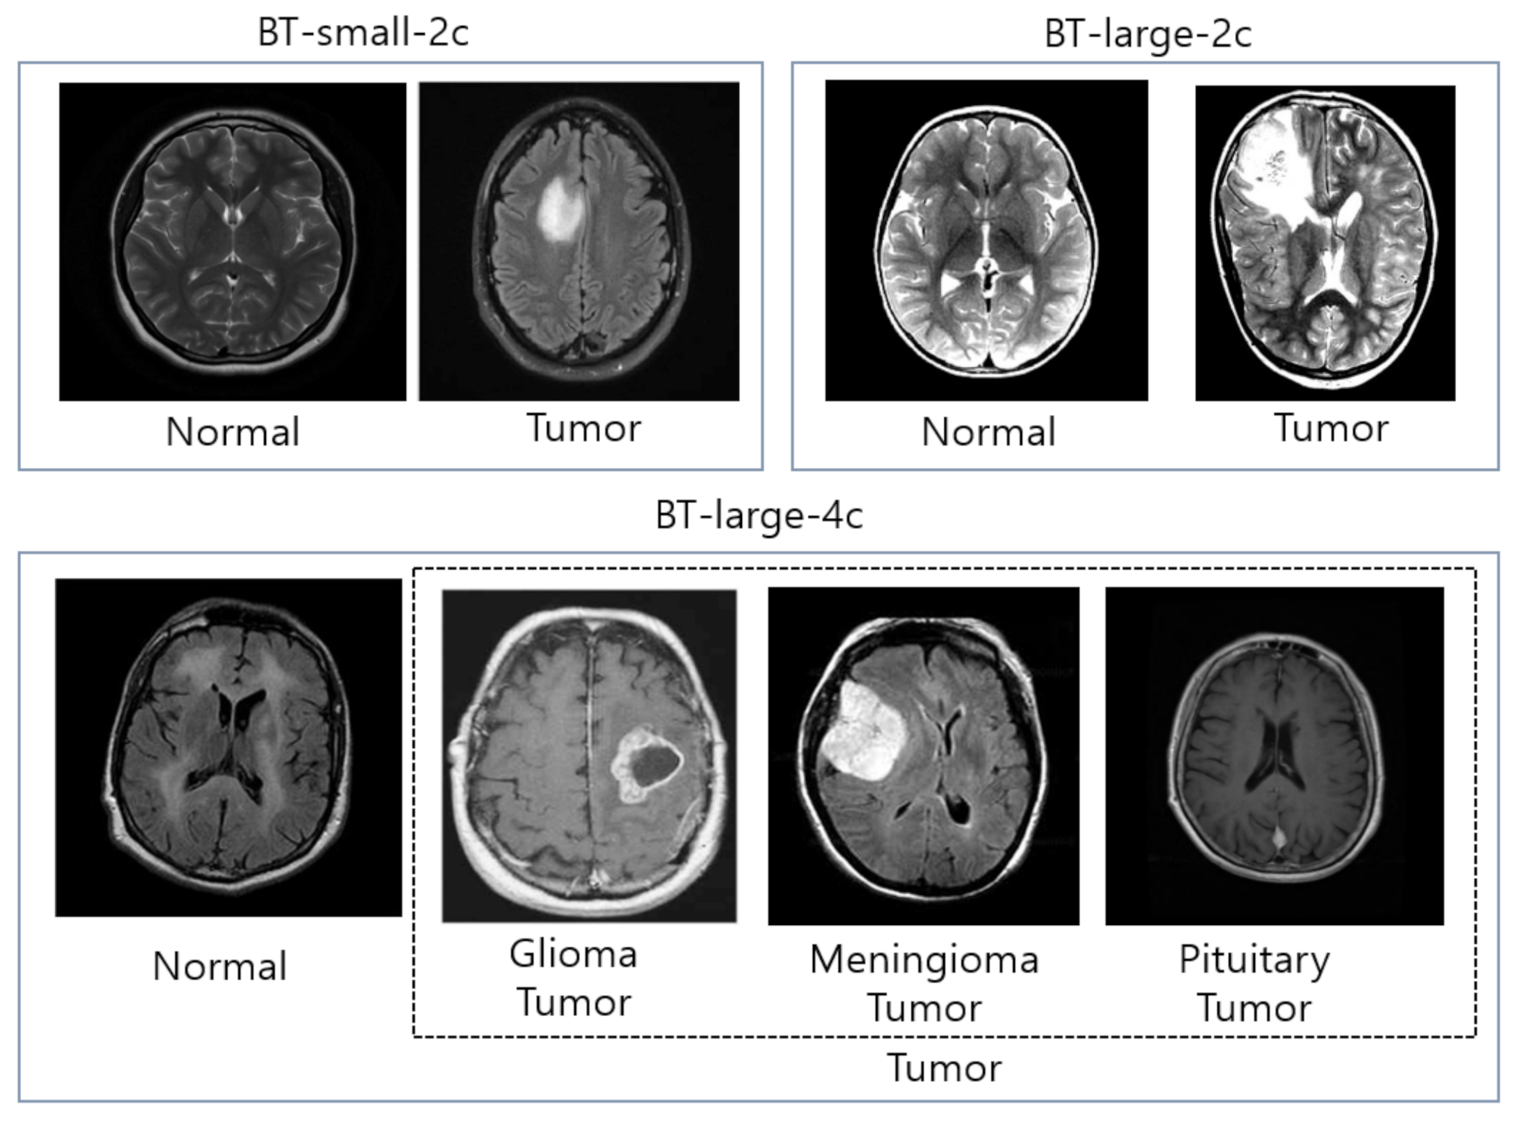

## 1. Dependencies

In [231]:
import tensorflow as tf
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam
from keras.utils import custom_object_scope
from keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import cv2
import os
import plotly.express as px

## 2. Load the dataset

**Loading dataset using 90% for training and 10% for validation. Use test_dataset for testing**

In [178]:
batch_size=32
img_height=128
img_width=128

base_dir = os.path.join(os.getcwd(), "brain-tumor-dataset/")
train_dir = os.path.join(base_dir, 'Training')
test_dir = os.path.join(base_dir, 'Testing')

# Load TrainSet
train_data = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=0.1,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 2870 files belonging to 4 classes.
Using 2583 files for training.


In [179]:
# Load ValidationSet

validation_data = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=0.1,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 2870 files belonging to 4 classes.
Using 287 files for validation.


In [180]:
# Load TestSet

test_data = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 2870 files belonging to 4 classes.


In [181]:
class_names = train_data.class_names
print(class_names)

['Glioma Tumor', 'Meningioma Tumor', 'No Tumor', 'Pituitary Tumor']


## 3. Exploratory Data Analysis (EDA)

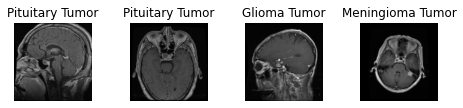

In [182]:
# Plotting sample images

plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
    for i in range(len(class_names)):
        ax = plt.subplot(6,5 , i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [183]:
# Count examples per class
dico = {}

num_examples_per_class = [0] * len(class_names)
for images, labels in train_data:
    for label in labels:
        num_examples_per_class[label.numpy()] += 1

# Print results
for i, class_name in enumerate(class_names):
    dico[class_name] = num_examples_per_class[i]
    print(f"{class_name}: {num_examples_per_class[i]}")

Glioma Tumor: 744
Meningioma Tumor: 739
No Tumor: 355
Pituitary Tumor: 745


In [184]:
fig = px.pie(names=dico.keys(),values=dico.values(),title='Label Information')
fig.update_layout({'title':{"x":0.1}})
fig.show()

## 5. Creating the Model (Using CNN)

 **What exactly is a CNN?**
 
In deep learning, a convolutional neural network (CNN/ConvNet) is a class of deep neural networks, most commonly applied to analyze visual imagery. Now when we think of a neural network we think about matrix multiplications but that is not the case with ConvNet. It uses a special technique called Convolution. Now in mathematics convolution is a mathematical operation on two functions that produces a third function that expresses how the shape of one is modified by the other.

Source: https://www.analyticsvidhya.com/blog/2021/05/convolutional-neural-networks-cnn/

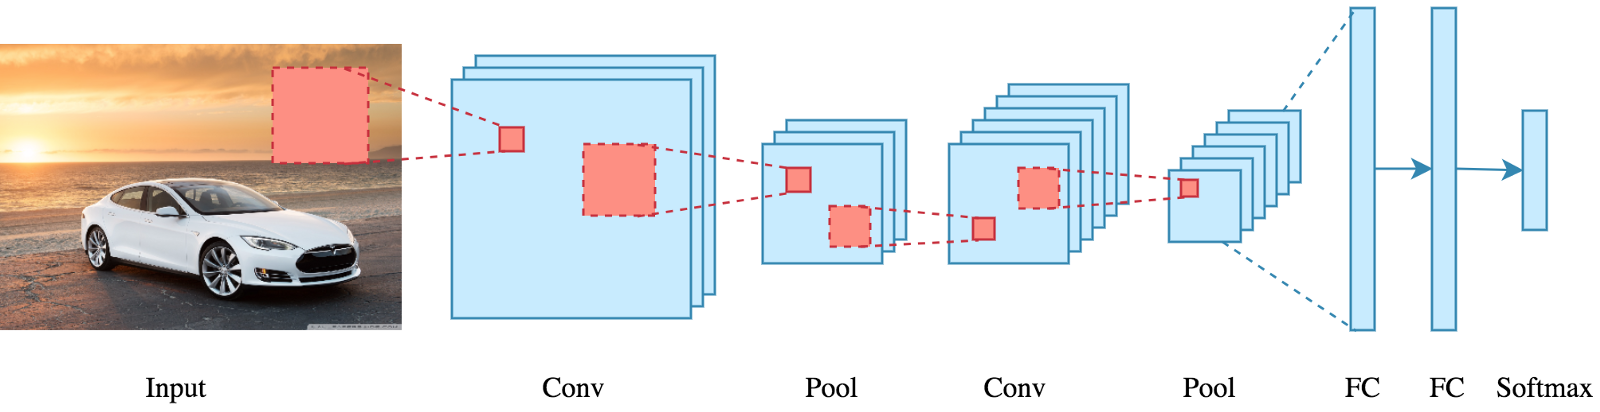

In [227]:
model = Sequential()

# Adding first Conv2D layer with 32 filters and 2x2 kernel size and 'same' padding
model.add(Conv2D(32, (2, 2), padding='same', input_shape=(128,128,3)))
model.add(Activation('relu'))

# Adding second Conv2D layer with 32 filters and 3x3 kernel size
model.add(Conv2D(32, (2, 2)))
model.add(Activation('relu'))

# Adding Max Pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Adding Dropout layer with 25% dropout rate
model.add(Dropout(0.2))

# Adding third Conv2D layer with 64 filters and 3x3 kernel size and 'same' padding
model.add(Conv2D(128, (2, 2), padding='same'))
model.add(Activation('relu'))

# Adding fourth Conv2D layer with 64 filters and 3x3 kernel size
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))

# Adding Max Pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Adding Dropout layer with 25% dropout rate
model.add(Dropout(0.25))

# Flattening the output from the previous layer
model.add(Flatten())

# Adding a dense layer with 128 neurons
model.add(Dense(128))
model.add(Activation('relu'))

# Adding another dropout layer with 50% dropout rate
model.add(Dropout(0.5))

# Adding a dense layer with 64 neurons
model.add(Dense(64))
model.add(Activation('relu'))

# Adding the output layer with 4 neurons and softmax activation
model.add(Dense(4, Activation('softmax')))

In [228]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

## 6. Training the model

In [187]:
history = model.fit(train_data, batch_size=50, validation_data=validation_data, epochs=15)

Epoch 1/15
81/81 [==============================] - 225s 3s/step - loss: 5.6509 - accuracy: 0.4986 - val_loss: 0.9097 - val_accuracy: 0.6899
Epoch 2/15
81/81 [==============================] - 203s 3s/step - loss: 0.7571 - accuracy: 0.7147 - val_loss: 0.5789 - val_accuracy: 0.7735
Epoch 3/15
81/81 [==============================] - 261s 3s/step - loss: 0.6067 - accuracy: 0.7662 - val_loss: 0.5251 - val_accuracy: 0.7875
Epoch 4/15
81/81 [==============================] - 245s 3s/step - loss: 0.4862 - accuracy: 0.8037 - val_loss: 0.4383 - val_accuracy: 0.8328
Epoch 5/15
81/81 [==============================] - 232s 3s/step - loss: 0.4205 - accuracy: 0.8417 - val_loss: 0.4221 - val_accuracy: 0.8362
Epoch 6/15
81/81 [==============================] - 231s 3s/step - loss: 0.3330 - accuracy: 0.8672 - val_loss: 0.3683 - val_accuracy: 0.8571
Epoch 7/15
81/81 [==============================] - 229s 3s/step - loss: 0.2842 - accuracy: 0.9044 - val_loss: 0.3876 - val_accuracy: 0.8676
Epoch 8/15
81

In [229]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 128, 128, 32)      416       
                                                                 
 activation_21 (Activation)  (None, 128, 128, 32)      0         
                                                                 
 conv2d_43 (Conv2D)          (None, 127, 127, 32)      4128      
                                                                 
 activation_22 (Activation)  (None, 127, 127, 32)      0         
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 dropout_31 (Dropout)        (None, 63, 63, 32)        0         
                                                     

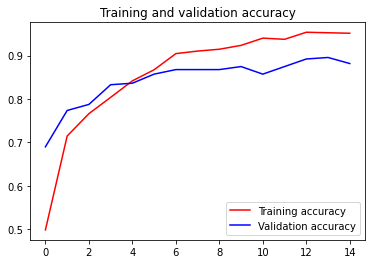

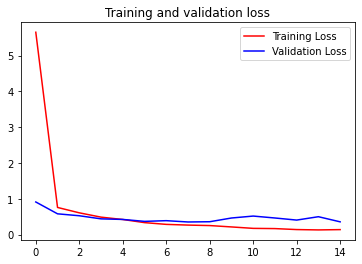

In [189]:
# Plotting accuracy and loss with each epoch

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## 7. Testing the model

In [190]:
actual = []
predictions = []
for images, labels in test_data:
    for i in range(0, len(images)):
        image = images[i]
        image = np.expand_dims(image, axis=0)
        result = model.predict(image)
        predictions.append(class_names[np.argmax(result)])
        actual.append(class_names[labels[i].numpy()])

1/1 [==============================] - 0s 73ms/step


1/1 [==============================] - 0s 57ms/step


1/1 [==============================] - 0s 55ms/step


1/1 [==============================] - 0s 64ms/step


1/1 [==============================] - 0s 66ms/step


1/1 [==============================] - 0s 54ms/step


1/1 [==============================] - 0s 53ms/step


1/1 [==============================] - 0s 54ms/step


1/1 [==============================] - 0s 67ms/step


1/1 [==============================] - 0s 56ms/step


**What is a Classification report?**

A classification report is a performance evaluation metric in machine learning. It is used to show the precision, recall, F1 Score, and support of your trained classification model.

Source: https://thecleverprogrammer.com/2021/07/07/classification-report-in-machine-learning/#:~:text=A%20classification%20report%20is%20a,of%20your%20trained%20classification%20model

In [202]:
print(classification_report(actual, predictions, target_names = class_names))

                  precision    recall  f1-score   support

    Glioma Tumor       0.99      0.98      0.99       826
Meningioma Tumor       0.97      0.97      0.97       822
        No Tumor       0.96      0.97      0.97       395
 Pituitary Tumor       0.99      1.00      0.99       827

        accuracy                           0.98      2870
       macro avg       0.98      0.98      0.98      2870
    weighted avg       0.98      0.98      0.98      2870



**What is a Confusion Matrix?**

A confusion matrix, as the name suggests, is a matrix of numbers that tell us where a model gets confused. It is a class-wise distribution of the predictive performance of a classification model—that is, the confusion matrix is an organized way of mapping the predictions to the original classes to which the data belong.

Source: https://www.v7labs.com/blog/confusion-matrix-guide

Text(0.5, 114.0, 'Predicted label')

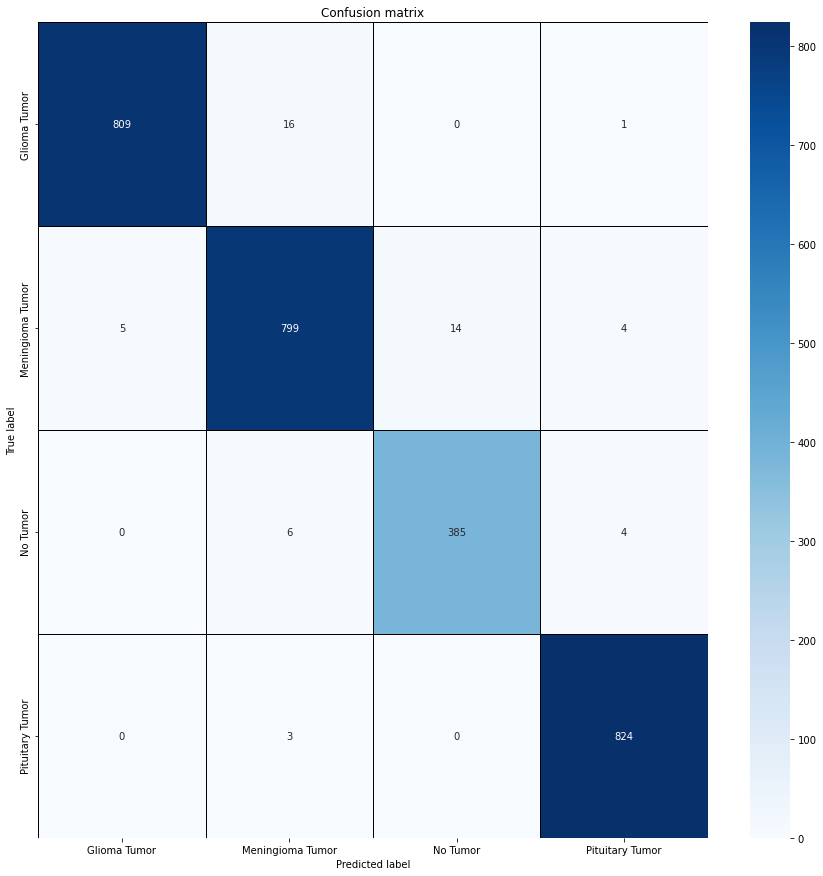

In [203]:
cm = confusion_matrix(actual, predictions)
cm_data_frame = pd.DataFrame(cm , index=class_names , columns=class_names)

plt.figure(figsize = (15,15))
plt.title("Confusion matrix")
sns.heatmap(cm_data_frame, cmap="Blues", linecolor='black' , linewidth=1 , annot=True, fmt='')
plt.ylabel('True label')
plt.xlabel('Predicted label')

## 8. Saving the model

In [210]:
model.save('saved_model/model.h5')

## 9. Loading the model

In [221]:
# Recreate the exact same model

with custom_object_scope({'Activation': Activation}):
    model_loaded = tf.keras.models.load_model('saved_model/model.h5', custom_objects={'Activation': Activation})

# Show the model architecture
model_loaded.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 128, 128, 32)      416       
                                                                 
 activation_7 (Activation)   (None, 128, 128, 32)      0         
                                                                 
 conv2d_35 (Conv2D)          (None, 127, 127, 32)      4128      
                                                                 
 activation_8 (Activation)   (None, 127, 127, 32)      0         
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 dropout_25 (Dropout)        (None, 63, 63, 32)        0         
                                                     

## 10. Making predictions

In [216]:
def prepare_image(filepath):
    img = cv2.imread(filepath)
    image = cv2.resize(img, (128, 128))
    img_array = np.expand_dims(image, axis=0)
    reshaped_image = np.reshape(img_array, (-1, 128, 128, 3))
    return reshaped_image 

In [217]:
image1 = prepare_image("brain-tumor-dataset/Testing/Glioma Tumor/image(39).jpg")
image2 = prepare_image("brain-tumor-dataset/Testing/No Tumor/image(3).jpg")
image3 = prepare_image("brain-tumor-dataset/Testing/Meningioma Tumor/image(9).jpg")
image4 = prepare_image("brain-tumor-dataset/Testing/Pituitary Tumor/image(11).jpg")

In [218]:
result1 = model_loaded.predict(image1)[0]
result2 = model_loaded.predict(image2)[0]
result3 = model_loaded.predict(image3)[0]
result4 = model_loaded.predict(image4)[0]

pnb1 = np.argmax(result1)
print(class_names[pnb1])

pnb2 = np.argmax(result2)
print(class_names[pnb2])

pnb3 = np.argmax(result3)
print(class_names[pnb3])

pnb4 = np.argmax(result4)
print(class_names[pnb4])

1/1 [==============================] - 0s 61ms/step
Meningioma Tumor
No Tumor
Meningioma Tumor
Pituitary Tumor
